# Clinical Center for Dementia Data

### Tasks:
* 	Data discovery
*	Research questions
*	Analysis
*	Predictive modelling
*	Conclusions
*	Proposed next steps


# Part 1: Data Cleaning 

In [ ]:
! pip install mord

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from mord import LogisticIT, LogisticAT


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas_profiling


In [2]:
file_path = "https://raw.githubusercontent.com/amarashi/dementia/main/o8t_testdata.csv"
df = pd.read_csv(file_path)

In [3]:
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (217, 48)


In [4]:
pd.set_option("display.max_columns", None)
df.head()

,Subject_ID,Label,Gender,Age,Education,Height,Weight,History of cerebrovascular disease,History of hypertension,History of diabetes,History of coronary heart disease,History of hyperlipidemia,History of anemia,History of CO poisoning,History of general anesthesia during surgery,History of abnormal thyroid function,History of traumatic brain injury,Family history of dementia,Smoking history,Drinking history,Unnamed: 21,NPI,MoCAB,MMSE,IADL,HAMA,HAMD,C1 HVLT(immediate memory),C5 HVLT（delayed recall 5min),C8 HVLT（delayed recall 20min),C4 logical memory（WMS）,C6 Boston Naming Test,C3 articulateness and verbal fluencey-vegetable （BNT）,C7-STT_A,C7-STT_B,C2 CFT Rey-O（imitation）,C9 CFT Rey-O（recall）,HD1 depressive mood,HD2 guilty,HD3 suicidal,HD7 work & interests,HA6 Total Score of Depressive Mood \n,Total score of Depression core factors,HA1 Anxiety,HA2 Tension,HA3 Fear,HA14 Interview perfomance,Total score of Anxiety factors
0,1,MCI,Male,77,165.0,90.0,9,Yes,Yes,No,No,Yes,No,No,Yes,No,No,Yes,No,No,NaN,0.0,14.0,20.0,14.0,4.0,3.0,17.0,3.0,3.0,6.0,19.0,13.0,0,218,30.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Dementia,Male,81,169.0,70.0,0,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,NaN,3.0,12.0,19.0,20.0,5.0,1.0,10.0,0.0,0.0,0.0,19.0,8.0,Unable to complete,Unable to complete,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3,Normal,Female,77,155.0,55.0,12,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,NaN,1.0,22.0,28.0,14.0,6.0,2.0,22.0,10.0,10.0,12.0,26.0,16.0,68,150,36.0,14.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0
3,4,Normal,Male,75,169.0,75.0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Normal,Male,68,NaN,NaN,9,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,0.0,24.0,28.0,14.0,2.0,1.0,23.0,9.0,8.0,8.0,27.0,15.0,34,94,36.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(df.columns)

Index(['Subject_ID', 'Label', 'Gender', 'Age', 'Education', 'Height', 'Weight',
       'History of cerebrovascular disease', 'History of hypertension',
       'History of diabetes', 'History of coronary heart disease',
       'History of hyperlipidemia', 'History of anemia',
       'History of CO poisoning',
       'History of general anesthesia during surgery',
       'History of abnormal thyroid function',
       'History of traumatic brain injury', 'Family history of dementia',
       'Smoking history', 'Drinking history', 'Unnamed: 21', 'NPI', 'MoCAB',
       'MMSE', 'IADL', 'HAMA', 'HAMD', 'C1 HVLT(immediate memory)',
       'C5 HVLT（delayed recall 5min)', 'C8 HVLT（delayed recall 20min)',
       'C4 logical memory（WMS）', 'C6 Boston Naming Test',
       'C3 articulateness and verbal fluencey-vegetable （BNT）', 'C7-STT_A',
       'C7-STT_B', 'C2 CFT Rey-O（imitation）', 'C9 CFT Rey-O（recall）',
       'HD1 depressive mood', 'HD2 guilty', 'HD3 suicidal',
       'HD7 work & interests', 'H

* NPI: The Neuropsychiatric Inventory (NPI) was developed by Cummings et al. (1994) to assess dementia-related behavioral symptoms which they felt other measures did not sufficiently address. The NPI originally examined 10 sub-domains of behavioral functioning: delusions, hallucinations, agitation/aggression, dysphoria, anxiety, euphoria, apathy, disinhibition, irritability/lability, and aberrant motor activity. Two more sub-domains have been added since its development: night-time behavioral disturbances and appetite and eating abnormalities (Cummings, 1997). This wide variety of domains means that, unlike other dementia measures, the NPI is able to screen for multiple types of dementia, not just Alzheimer’s Disease.

* MMSE: Mini-Mental State Examination (MMSE): This test is usually takes around 5 minutes to complete. The MMSE is the most common neuropsychological test for the screening of Alzheimer’s disease and other causes of dementia. It assesses skills such as reading, writing, orientation and short-term memory.

* MoCa (Montreal Cognitive Assessment): maximum of 30 points. A final total. score of 26 and above is considered normal.

* IADL: INSTRUMENTAL ACTIVITIES OF DAILY LIVING SCALE (I.A.D.L.): This instrument is intended to be used among older adults, and can be used in community or hospital settings. The instrument is not useful for institutionalized older adults. It can be used as a baseline assessment tool and to compare baseline function to periodic assessments.

* HAMA: Hamilton Anxiety Rating Scale: measure the severity of anxiety symptoms among individuals previously diagnosed with anxiety disorders.

* HAMD: Hamilton Depression Rating Scale (HAMD): depression assessment scale.

* STT-A/B: Shape Trail Test: Variant of the Trail Making Test: the most sensitive and popular tests for identifying mild cognitive impairment and mild dementia.



### Clean column names:
* remove unwanted white spaces or replce them with '_'.
* replace '-' with '_'.
* remove non-alpha-numeric characters other than '_'.
* make them lower case


In [6]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace('[^a-zA-Z0-9_ ]', '', regex=True).str.lower()

df.columns

Index(['subject_id', 'label', 'gender', 'age', 'education', 'height', 'weight',
       'history_of_cerebrovascular_disease', 'history_of_hypertension',
       'history_of_diabetes', 'history_of_coronary_heart_disease',
       'history_of_hyperlipidemia', 'history_of_anemia',
       'history_of_co_poisoning',
       'history_of_general_anesthesia_during_surgery',
       'history_of_abnormal_thyroid_function',
       'history_of_traumatic_brain_injury', 'family_history_of_dementia',
       'smoking_history', 'drinking_history', 'unnamed_21', 'npi', 'mocab',
       'mmse', 'iadl', 'hama', 'hamd', 'c1_hvltimmediate_memory',
       'c5_hvltdelayed_recall_5min', 'c8_hvltdelayed_recall_20min',
       'c4_logical_memorywms', 'c6_boston_naming_test',
       'c3_articulateness_and_verbal_fluencey_vegetable_bnt', 'c7_stt_a',
       'c7_stt_b', 'c2_cft_rey_oimitation', 'c9_cft_rey_orecall',
       'hd1_depressive_mood', 'hd2_guilty', 'hd3_suicidal',
       'hd7_work__interests', 'ha6_total_score_o

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 48 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   subject_id                                           217 non-null    int64  
 1   label                                                212 non-null    object 
 2   gender                                               217 non-null    object 
 3   age                                                  217 non-null    int64  
 4   education                                            215 non-null    float64
 5   height                                               215 non-null    float64
 6   weight                                               217 non-null    int64  
 7   history_of_cerebrovascular_disease                   217 non-null    object 
 8   history_of_hypertension                              217 non-null    o

In [8]:
df.describe(include=[np.number])

,subject_id,age,education,height,weight,unnamed_21,npi,mocab,mmse,iadl,hama,hamd,c1_hvltimmediate_memory,c5_hvltdelayed_recall_5min,c8_hvltdelayed_recall_20min,c4_logical_memorywms,c6_boston_naming_test,c3_articulateness_and_verbal_fluencey_vegetable_bnt,c2_cft_rey_oimitation,c9_cft_rey_orecall,hd1_depressive_mood,hd2_guilty,hd3_suicidal,hd7_work__interests,ha6_total_score_of_depressive_mood,total_score_of_depression_core_factors,ha1_anxiety,ha2_tension,ha3_fear,ha14_interview_perfomance,total_score_of_anxiety_factors
count,217.000000,217.000000,215.000000,215.000000,217.000000,0.0,215.000000,215.000000,215.000000,215.000000,215.000000,216.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,109.000000,71.589862,162.423256,62.200000,10.451613,NaN,2.883721,16.944186,22.627907,17.972093,7.162791,5.532407,14.830986,3.943662,3.962441,6.591549,19.859155,11.431925,27.474178,9.446009,0.481481,0.277778,0.092593,0.379630,0.648148,1.879630,0.748837,0.530233,0.148837,0.120930,1.548837
std,62.786676,7.582417,7.912631,10.014685,4.500896,NaN,4.836627,7.385680,6.511755,6.044165,4.922437,4.444894,7.320144,3.657071,3.670188,3.478685,5.961264,4.665339,11.078006,8.728783,0.812478,0.679717,0.348740,0.762097,0.833204,2.657915,1.005678,0.874225,0.479667,0.379718,1.961352
min,1.000000,50.000000,138.000000,41.000000,0.000000,NaN,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,66.000000,157.000000,55.000000,9.000000,NaN,0.000000,11.000000,20.000000,14.000000,4.000000,2.000000,10.000000,0.000000,0.000000,4.000000,16.000000,8.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,109.000000,72.000000,162.000000,60.000000,9.000000,NaN,1.000000,18.000000,25.000000,16.000000,6.000000,5.000000,15.000000,4.000000,4.000000,7.000000,21.000000,11.000000,33.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,163.000000,77.000000,169.000000,69.000000,14.000000,NaN,3.000000,23.000000,27.000000,19.500000,10.000000,8.250000,20.000000,7.000000,7.000000,9.000000,24.000000,15.000000,35.000000,16.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.500000,1.000000,0.000000,0.000000,2.000000
max,217.000000,92.000000,182.000000,92.000000,20.000000,NaN,27.000000,29.000000,30.000000,54.000000,26.000000,21.000000,31.000000,12.000000,12.000000,14.000000,29.000000,22.000000,36.000000,29.000000,3.000000,3.000000,2.000000,3.000000,3.000000,13.000000,3.000000,3.000000,2.000000,2.000000,8.000000


In [9]:
df.describe(include=[np.object])

,label,gender,history_of_cerebrovascular_disease,history_of_hypertension,history_of_diabetes,history_of_coronary_heart_disease,history_of_hyperlipidemia,history_of_anemia,history_of_co_poisoning,history_of_general_anesthesia_during_surgery,history_of_abnormal_thyroid_function,history_of_traumatic_brain_injury,family_history_of_dementia,smoking_history,drinking_history,c7_stt_a,c7_stt_b
count,212,217,217,217,217,217,217,217,217,217,217,217,217,217,217,213,213
unique,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,99,115
top,MCI,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,Unable to complete,Unable to complete
freq,87,117,193,116,185,181,157,180,215,109,196,192,162,171,197,16,43


### observed issues:
* 'subject_id'  is not needed.
* 'unnamed_21'  is empty.
* 'c7_stt_a' and 'c7_stt_a' are numeric but listed as object (because of 'Unable to complete' values).
* 'label' has 5 unique levels.
* some fileds, including 'label' have missing values.

### fixing the issues:
* drop 'subject_id' and 'unname_21'

In [10]:
cols_to_drop = ['subject_id','unnamed_21']
df = df.drop(cols_to_drop, axis=1)

* convert 'c7_stt_a' and 'c7_stt_a' to numeric, replace 'Unable to complete' with NA

In [11]:
df.replace('Unable to complete', np.nan,inplace=True)
df[['c7_stt_a', 'c7_stt_b']] = df[['c7_stt_a', 'c7_stt_b']].apply(pd.to_numeric)

* 'label' has 5 unique levels.

In [12]:
df.label.value_counts()

MCI             87
Normal          83
Dementia        40
MCI，naMCI_MD     1
MCI？Dementia     1
Name: label, dtype: int64

In [13]:
df.label[~df['label'].isin(["MCI","Normal", "Dementia"])] = np.nan

C:\Users\a_mar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.label.value_counts()

MCI         87
Normal      83
Dementia    40
Name: label, dtype: int64

* fix missing values:

yellow is missing. blue is not missing.

<AxesSubplot:>

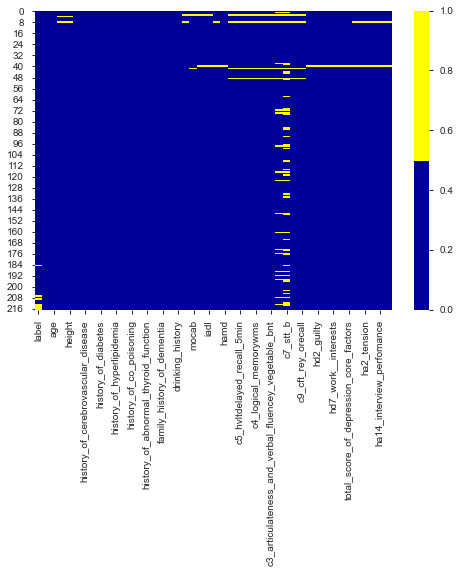

In [15]:
cols = df.columns
colours = ['#000099', '#ffff00']  
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

some coulmns and rows have more missing than the others. 
* remove rows which 'label' is missing

In [16]:
 df.dropna(subset=['label'],inplace=True) 

* remove rows which more than 3 values are missing

In [17]:
 df.dropna(thresh= df.shape[1]-3,inplace=True) 

* impute other missing values (Multivariate imputer that estimates each feature from all the others.)

In [18]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

In [19]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [20]:
imp.fit(df_numeric)

IterativeImputer(random_state=0)

In [21]:
df[numeric_cols] = np.round(imp.transform(df_numeric))

In [22]:
df.head()

,label,gender,age,education,height,weight,history_of_cerebrovascular_disease,history_of_hypertension,history_of_diabetes,history_of_coronary_heart_disease,history_of_hyperlipidemia,history_of_anemia,history_of_co_poisoning,history_of_general_anesthesia_during_surgery,history_of_abnormal_thyroid_function,history_of_traumatic_brain_injury,family_history_of_dementia,smoking_history,drinking_history,npi,mocab,mmse,iadl,hama,hamd,c1_hvltimmediate_memory,c5_hvltdelayed_recall_5min,c8_hvltdelayed_recall_20min,c4_logical_memorywms,c6_boston_naming_test,c3_articulateness_and_verbal_fluencey_vegetable_bnt,c7_stt_a,c7_stt_b,c2_cft_rey_oimitation,c9_cft_rey_orecall,hd1_depressive_mood,hd2_guilty,hd3_suicidal,hd7_work__interests,ha6_total_score_of_depressive_mood,total_score_of_depression_core_factors,ha1_anxiety,ha2_tension,ha3_fear,ha14_interview_perfomance,total_score_of_anxiety_factors
0,MCI,Male,77.0,165.0,90.0,9.0,Yes,Yes,No,No,Yes,No,No,Yes,No,No,Yes,No,No,0.0,14.0,20.0,14.0,4.0,3.0,17.0,3.0,3.0,6.0,19.0,13.0,0.0,218.0,30.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dementia,Male,81.0,169.0,70.0,0.0,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,3.0,12.0,19.0,20.0,5.0,1.0,10.0,0.0,0.0,0.0,19.0,8.0,117.0,282.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,Normal,Female,77.0,155.0,55.0,12.0,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,1.0,22.0,28.0,14.0,6.0,2.0,22.0,10.0,10.0,12.0,26.0,16.0,68.0,150.0,36.0,14.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0
4,Normal,Male,68.0,164.0,64.0,9.0,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,24.0,28.0,14.0,2.0,1.0,23.0,9.0,8.0,8.0,27.0,15.0,34.0,94.0,36.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,MCI,Male,65.0,168.0,70.0,9.0,No,Yes,No,No,No,No,No,Yes,No,No,No,Yes,Yes,0.0,19.0,24.0,16.0,8.0,12.0,9.0,3.0,2.0,7.0,17.0,11.0,47.0,181.0,34.0,20.0,1.0,0.0,1.0,2.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0


# Part 2: Exploratory Data Analysis

### Basic demographics of the patients

([<matplotlib.patches.Wedge at 0x210d9be8f08>,
 [Text(-1.090680796277752, -0.14288247139145077, 'Female'),
  Text(1.0906807829001248, 0.1428825735083559, 'Male')],
 [Text(-0.5949167979696829, -0.07793589348624587, '54.1%'),
  Text(0.5949167906727953, 0.07793594918637593, '45.9%')])

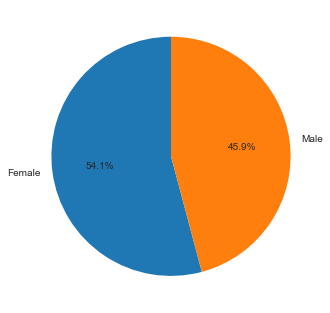

In [23]:
p = df.gender.value_counts(normalize=True)
plt.pie(p,labels = p.index,startangle=90,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x210d9c3a708>,
 [Text(-1.0650209907115689, 0.27519136858511495, 'MCI'),
  Text(0.7381291320838266, -0.815576718873937, 'Normal'),
  Text(0.604981417350655, 0.9186933572527848, 'Dementia')],
 [Text(-0.5809205403881283, 0.15010438286460812, '42.0%'),
  Text(0.40261589022754174, -0.44486002847669287, '39.5%'),
  Text(0.32998986400944813, 0.501105467592428, '18.5%')])

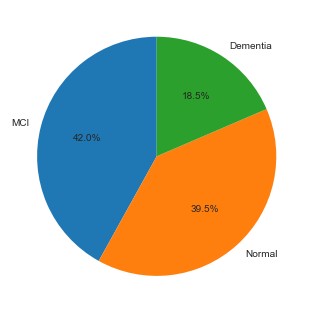

In [24]:
p = df.label.value_counts(normalize=True)
plt.pie(p,labels = p.index,startangle=90,autopct='%1.1f%%')

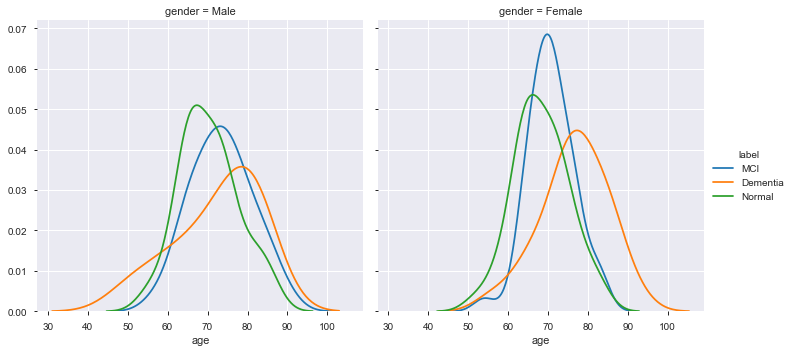

In [25]:
g = sns.FacetGrid(df, hue = "label", col="gender", height=5, aspect=1)
g.map(sns.kdeplot, "age")
g.add_legend()

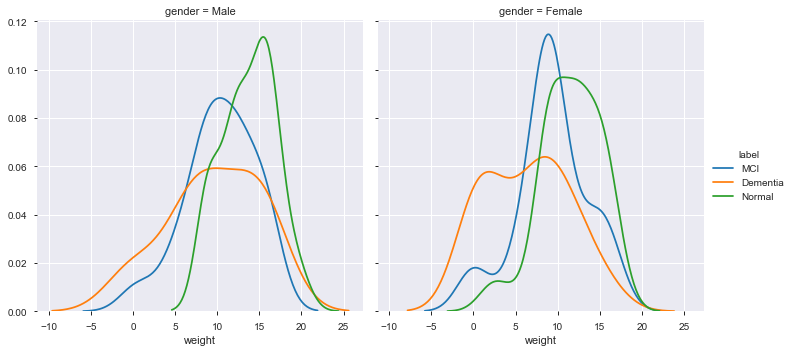

In [26]:
g = sns.FacetGrid(df, hue = "label", col="gender", height=5, aspect=1)
g.map(sns.kdeplot, "weight")
g.add_legend()

### Explore the relation between the 'label' and some of the numeric fields

divide the numeric columns into relevant groups

In [27]:
demo_cols = ['age', 'education', 'height', 'weight']
test_cols = ['npi', 'mocab', 'mmse','iadl', 'hama', 'hamd']
c_cols = ['c1_hvltimmediate_memory','c5_hvltdelayed_recall_5min', 'c8_hvltdelayed_recall_20min','c4_logical_memorywms', 'c6_boston_naming_test',
       'c3_articulateness_and_verbal_fluencey_vegetable_bnt', 'c7_stt_a','c7_stt_b', 'c2_cft_rey_oimitation', 'c9_cft_rey_orecall']
tot_score_cols =['ha6_total_score_of_depressive_mood', 'total_score_of_depression_core_factors','total_score_of_anxiety_factors']

### Demographic columns

* As expected, for both males and females, average age for patients with dementia is higher than patients with MCI and normal group.
* Education and height seem to be uncorrelated with dementia and MCI
* Patients with dementia and MCI seem to be lighter than normal patients. Considering that height is similar for all groups, lighter weight means lower BMI for patients with dementia and MCI.


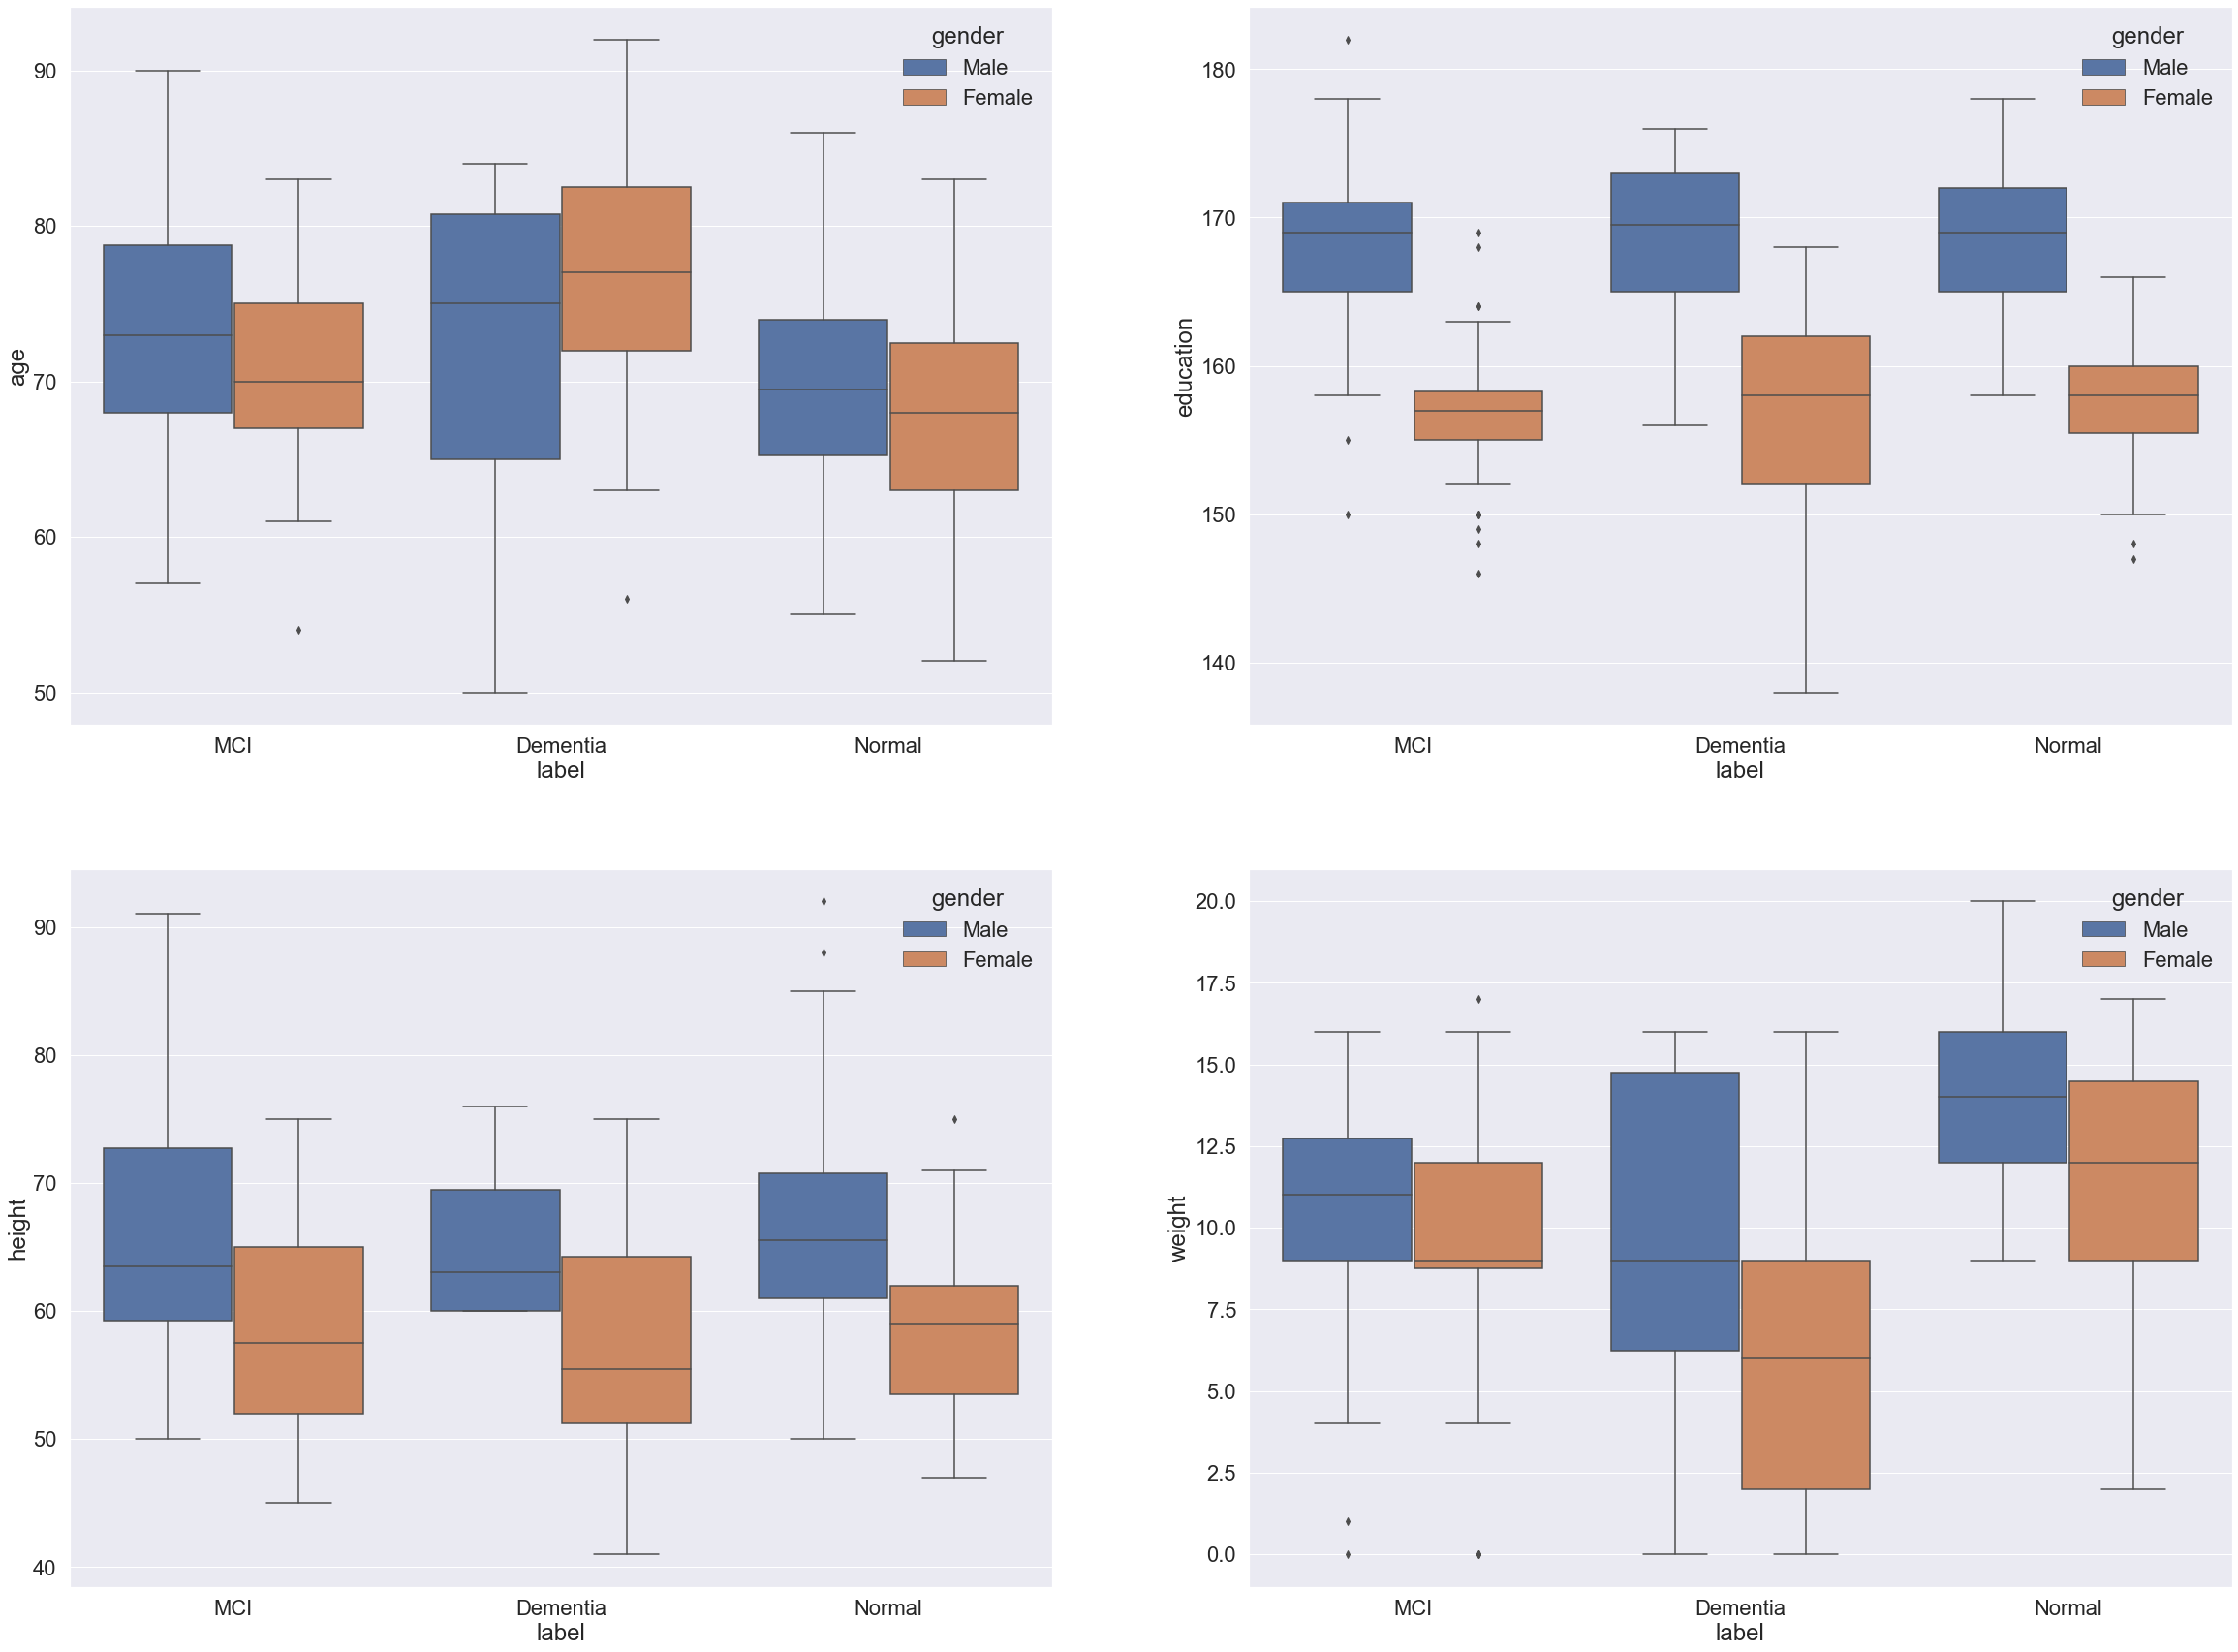

In [28]:
sns.set(font_scale = 2)

count=1
plt.subplots(figsize=(40, 30))
for cl in demo_cols:
    plt.subplot(2,2,count)
    sns.boxplot(x="label", y=cl,  hue="gender", data=df)
    count+=1
plt.show()

### Tests scores
It is clear that these tests and scores are highly corelated with the labels.
Infact, it seems like the lables are assigned using the scores of these tests.


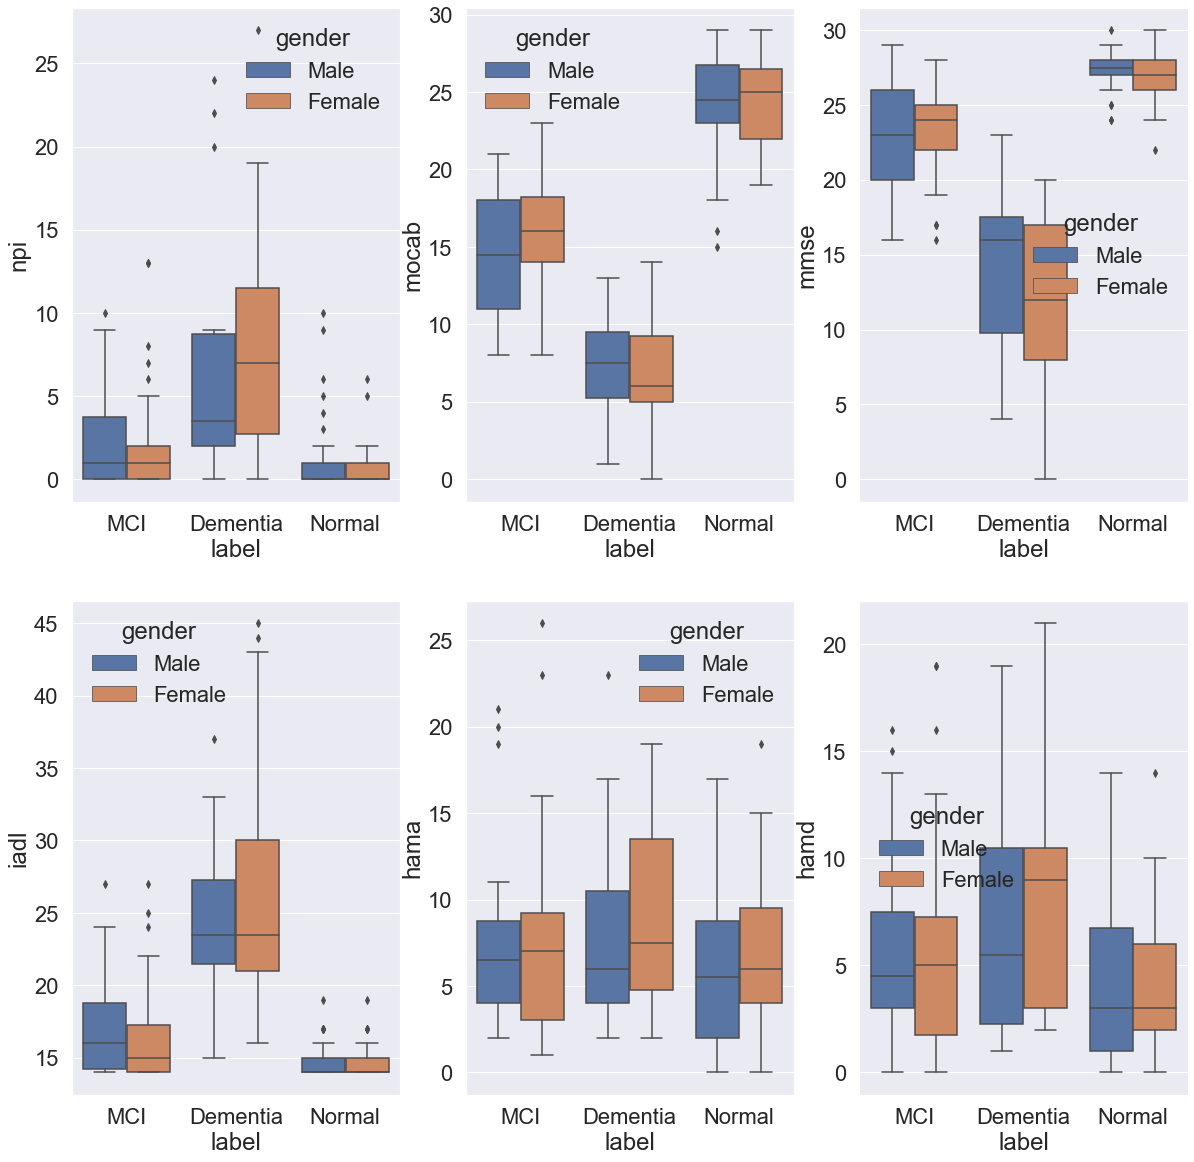

In [29]:
count=1
plt.subplots(figsize=(20, 20))
for cl in test_cols:
    plt.subplot(2,3,count)
    sns.boxplot(x="label", y=cl,  hue="gender", data=df)
    count+=1
plt.show()

### other scores: 

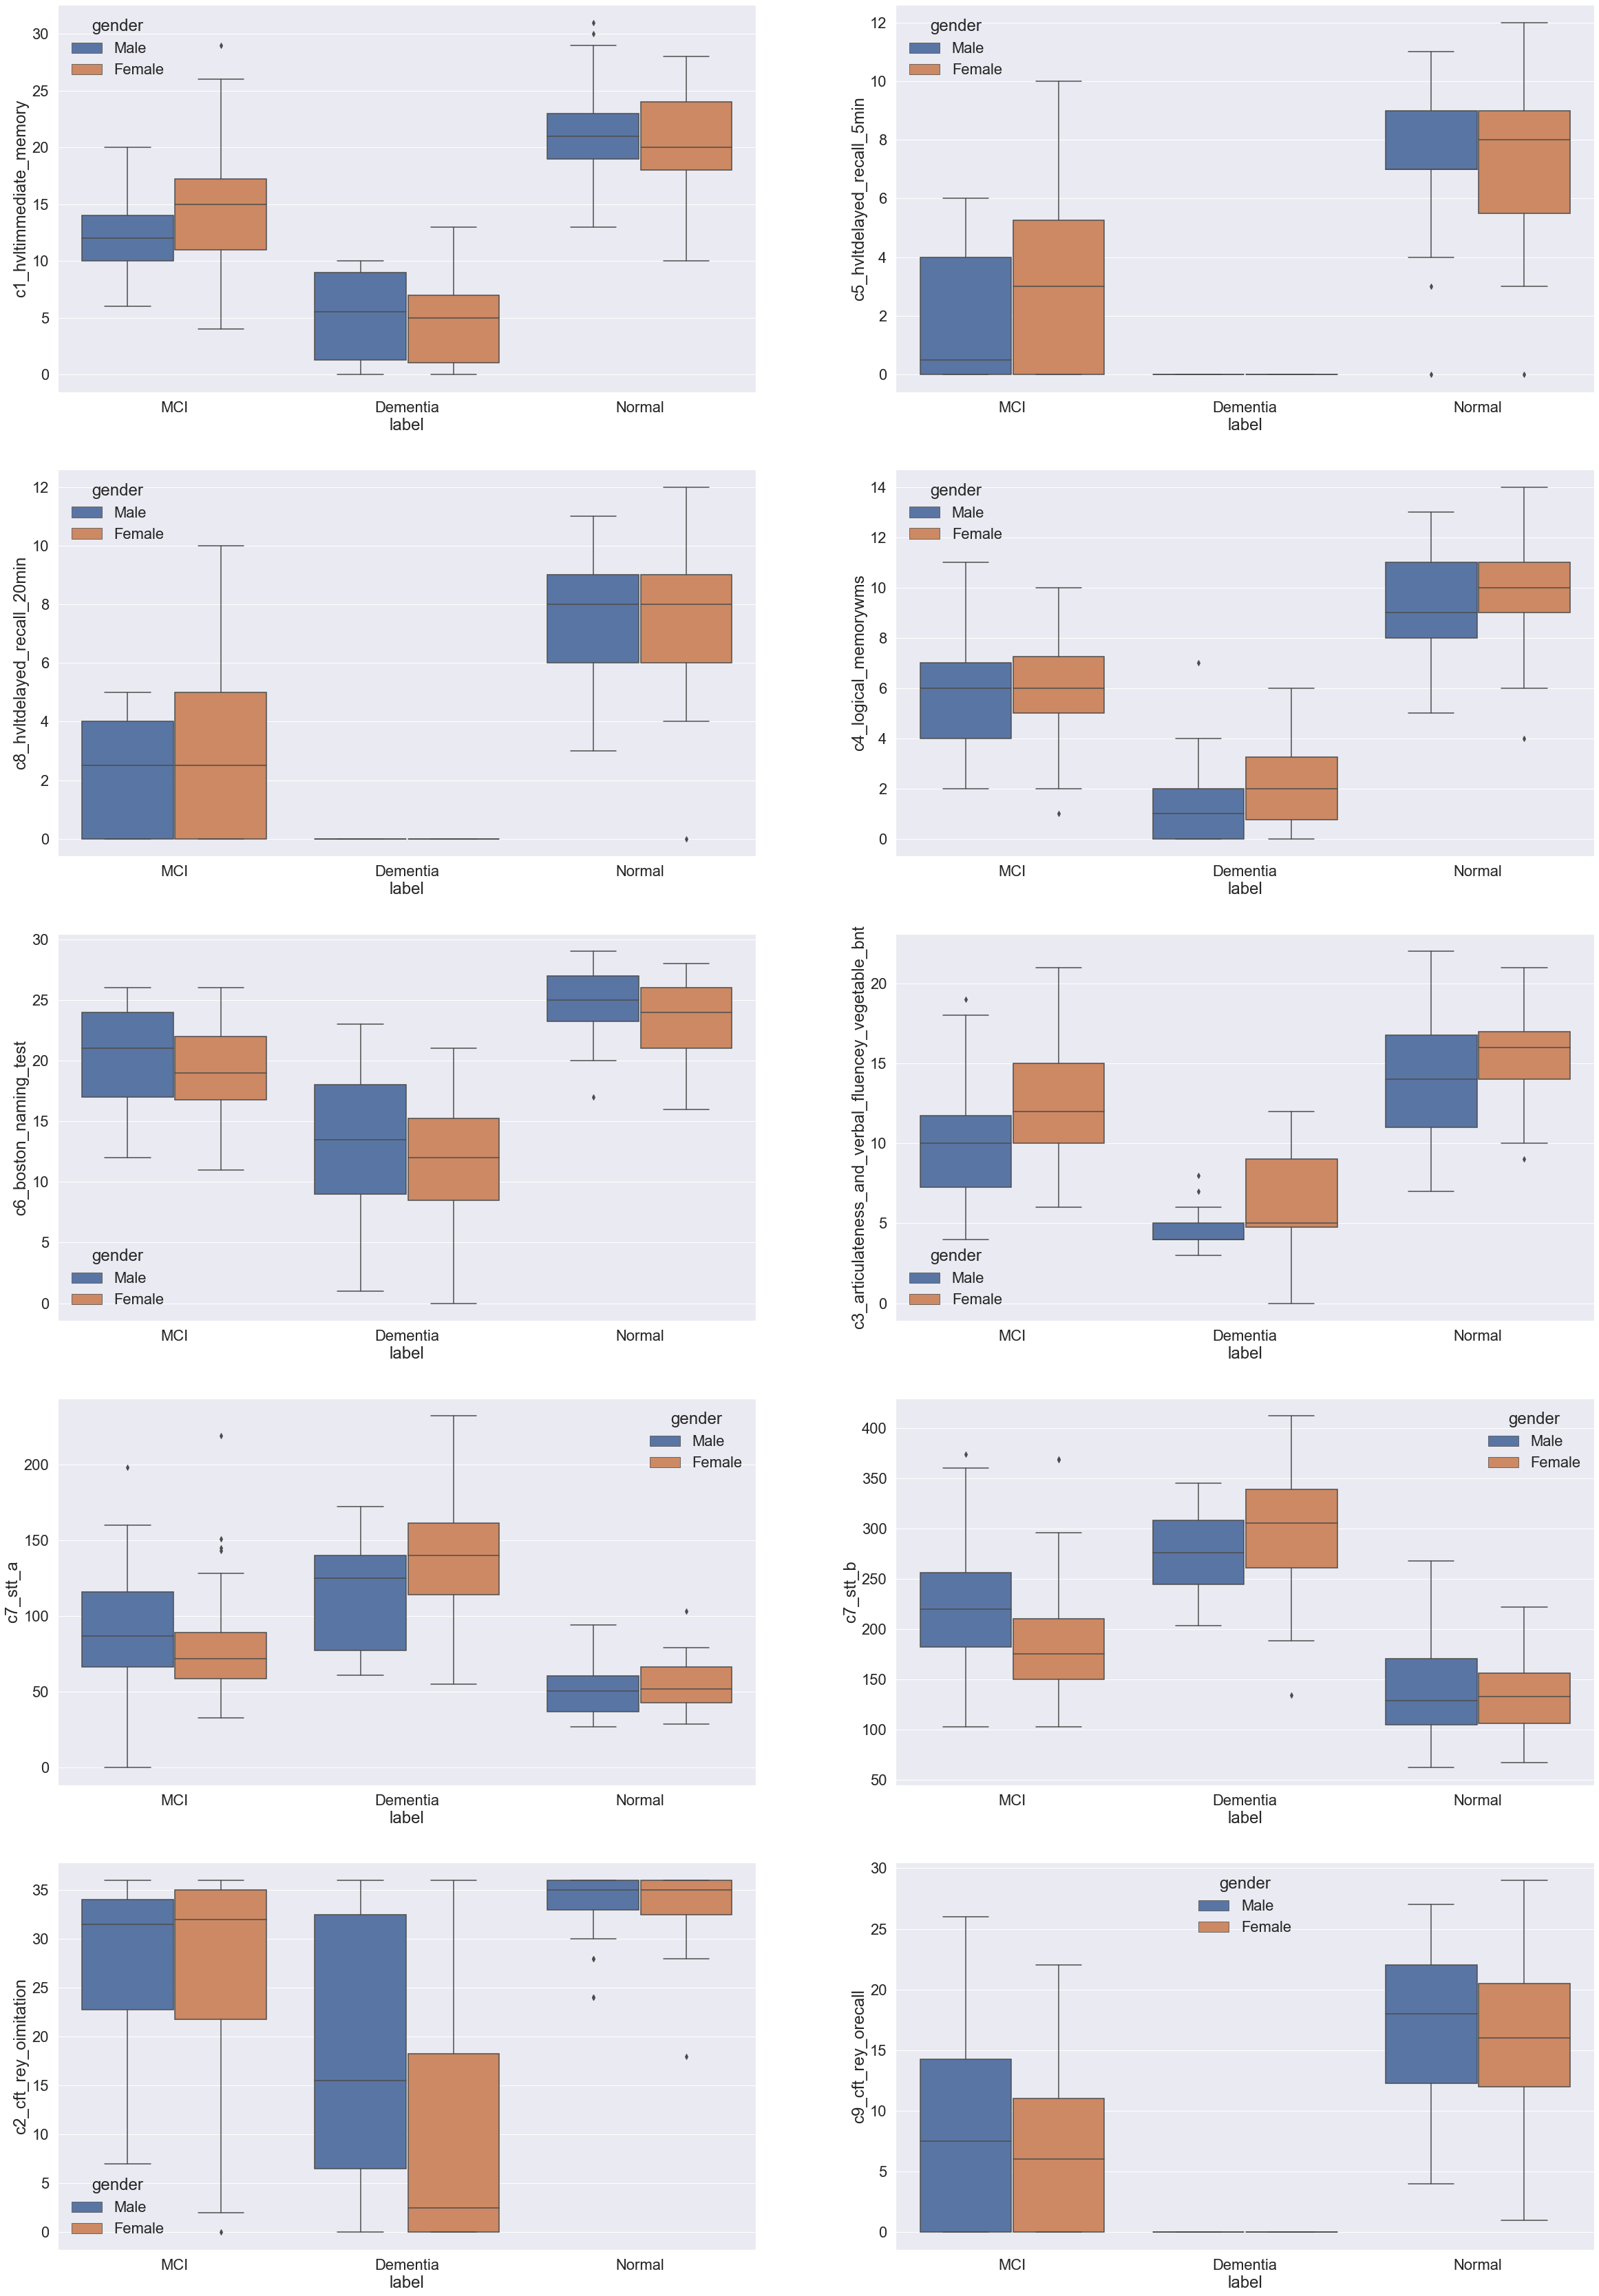

In [30]:
count=1
plt.subplots(figsize=(40, 60))
for cl in c_cols:
    plt.subplot(5,2,count)
    sns.boxplot(x="label", y=cl,  hue="gender", data=df)
    count+=1
plt.show()

### Anxiety and depression:

Patients with dementia seem to have higher score for depressive mood and depression.

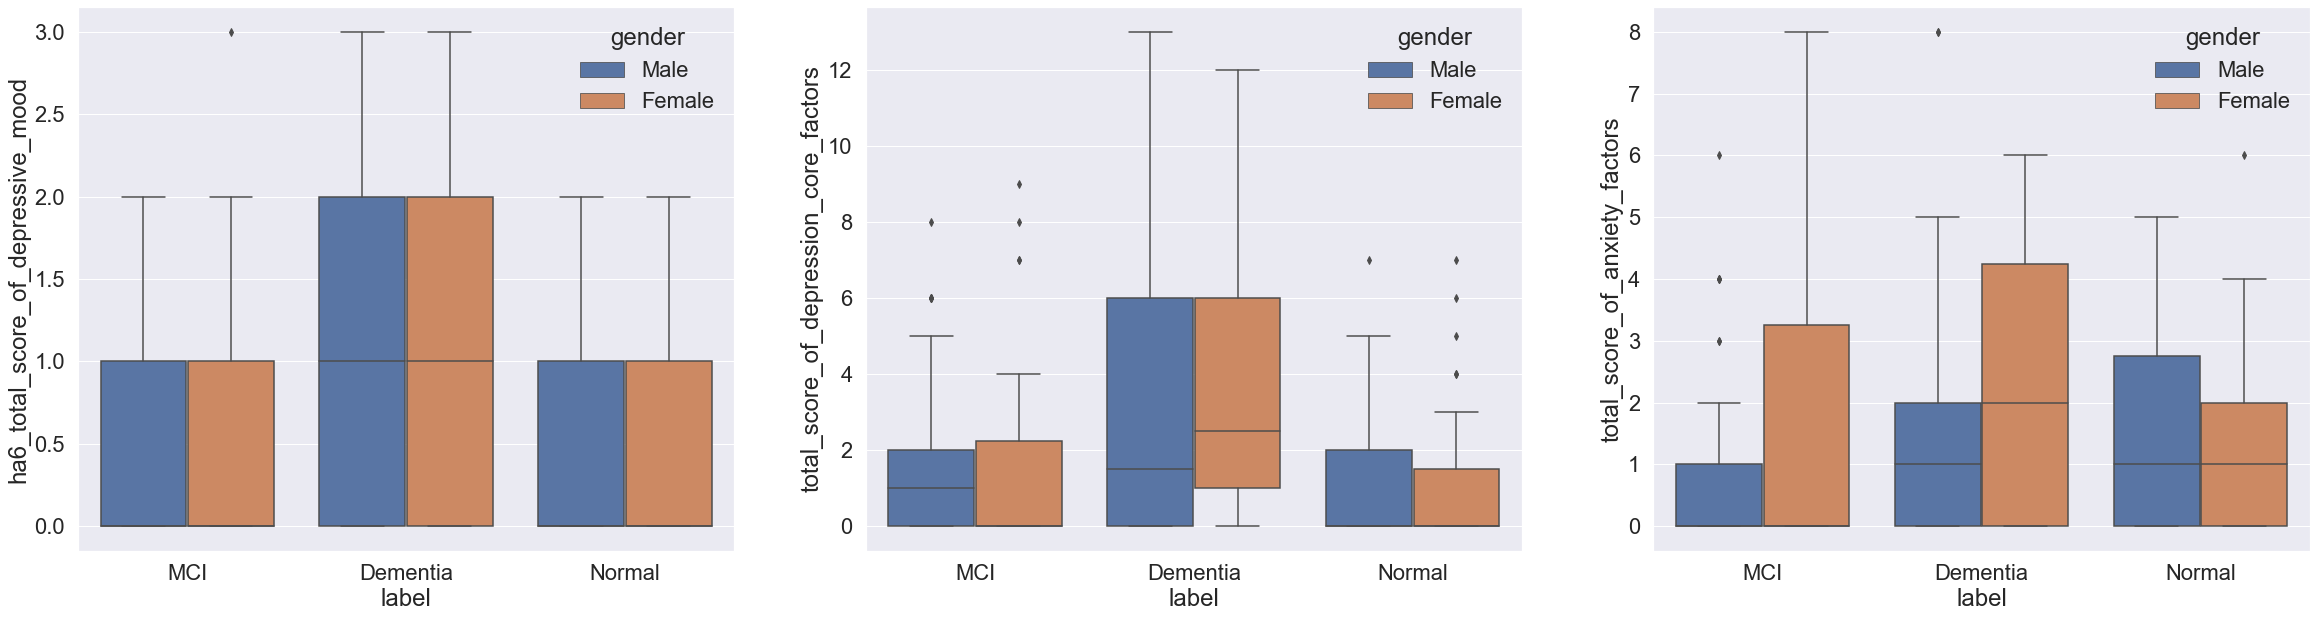

In [31]:
count=1
plt.subplots(figsize=(40, 10))
for cl in tot_score_cols:
    plt.subplot(1,3,count)
    sns.boxplot(x="label", y=cl,  hue="gender", data=df)
    count+=1
plt.show()

Convert label to numeric to calculate corelations (0: dementia, 1: MCI, 2:normal):

In [32]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['label'] = lb_make.fit_transform(df['label'])


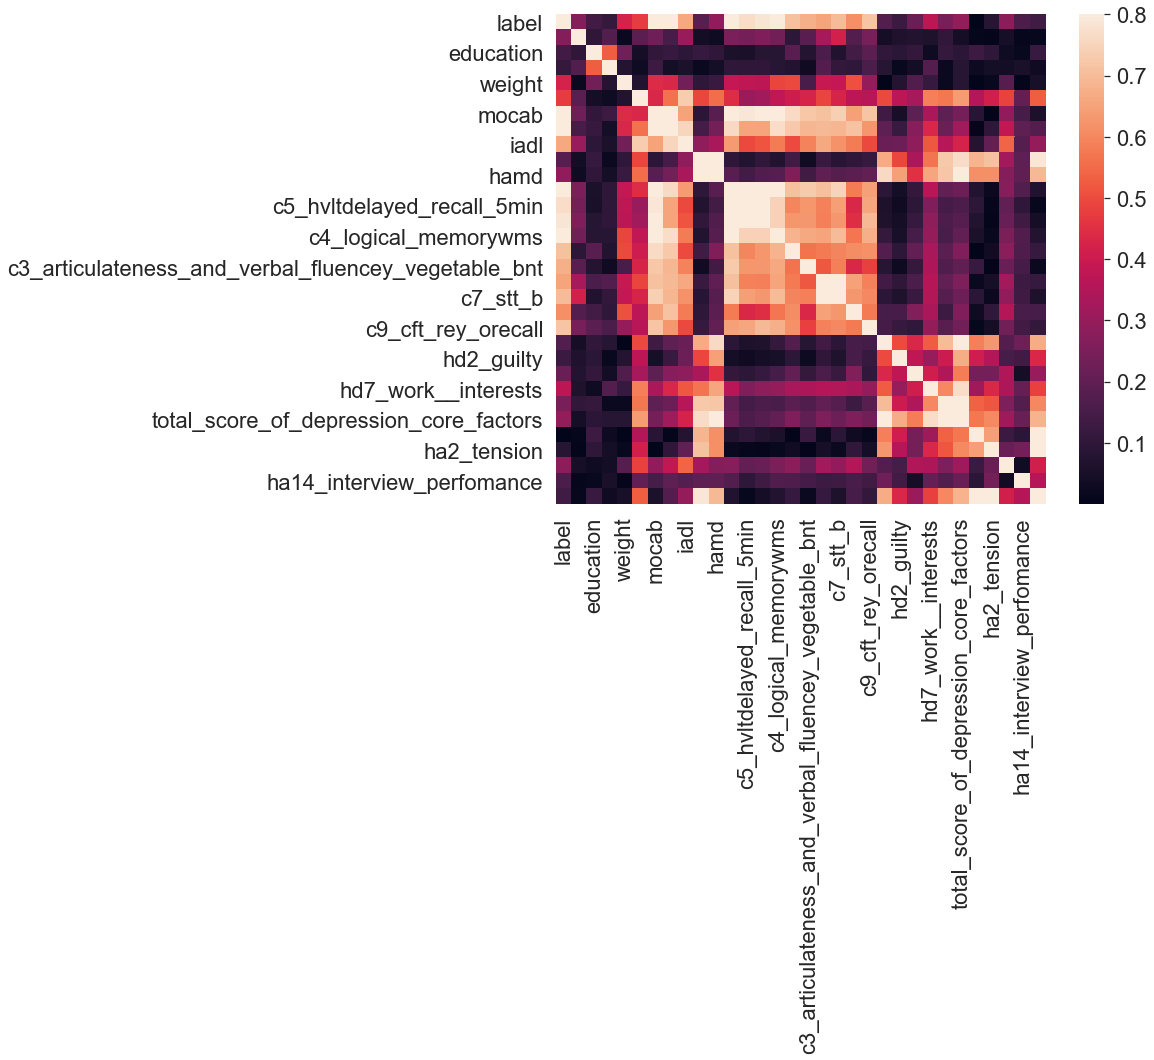

In [33]:
corrmat = abs(df.corr())
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Top 10 features highly corelated with label:
* mocab
* logical_memory
* mmse
* immidiate_memory
* delayed_recall_20min
* delayed_recall_5min
* rayo_recall
* boston_naming_test
* stt_b

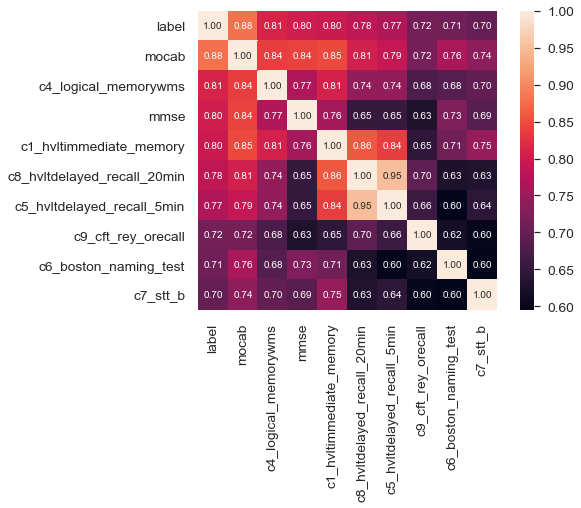

In [34]:
k = 10 
cols = corrmat.nlargest(k, 'label')['label'].index
cm = abs(np.corrcoef(df[cols].values.T))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### check how seperated the labels are, using PCA

In [35]:
dfPca = df[cols].copy()

In [36]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dfPca.drop('label',axis=1).values)
dfPca['pca-one'] = pca_result[:,0]
dfPca['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.97511077 0.01451913]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

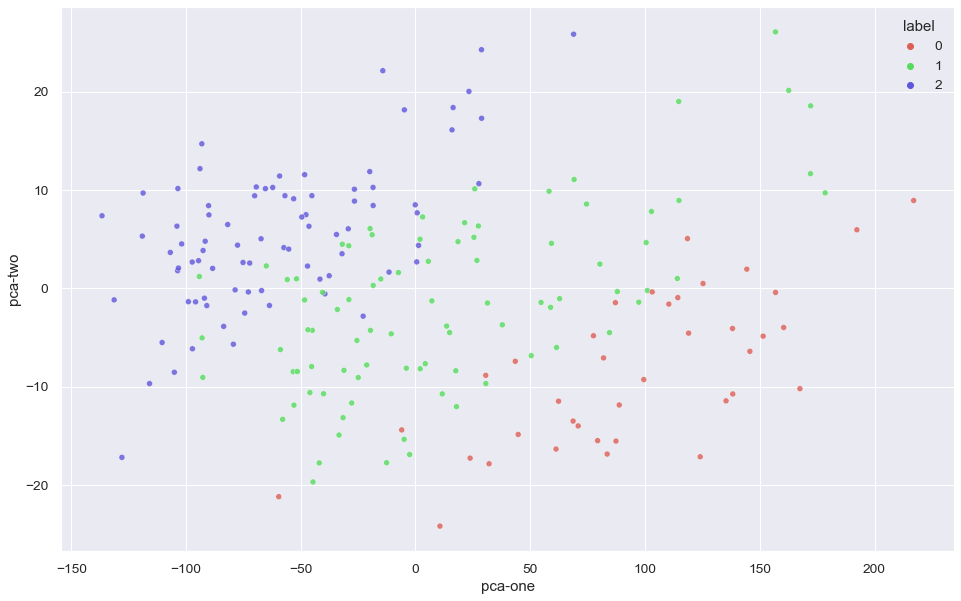

In [37]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 3),
    data=dfPca,
    legend="full",
    alpha=0.8
)

# Part 3: modelling

## Q1: How well patients' demographics, history, anxiety and depression status can help to predict dementia and MCI?

In [70]:
df_object = df.select_dtypes(include=[np.object])
object_cols = df_object.columns.values
df = pd.get_dummies(df, columns = object_cols,drop_first= True)

In [71]:
q1Cols = ['age', 'education', 'height', 'weight', 'hama', 'hamd', 
       'hd1_depressive_mood', 'hd2_guilty', 'hd3_suicidal',
       'hd7_work__interests', 
       'ha1_anxiety', 'ha2_tension',
       'ha3_fear', 'ha14_interview_perfomance',
       'total_score_of_anxiety_factors', 'gender_Male',
       'history_of_cerebrovascular_disease_Yes', 'history_of_hypertension_Yes',
       'history_of_diabetes_Yes', 'history_of_coronary_heart_disease_Yes',
       'history_of_hyperlipidemia_Yes', 'history_of_anemia_Yes',
       'history_of_co_poisoning_Yes',
       'history_of_general_anesthesia_during_surgery_Yes',
       'history_of_abnormal_thyroid_function_Yes',
       'history_of_traumatic_brain_injury_Yes',
       'family_history_of_dementia_Yes', 'smoking_history_Yes',
       'drinking_history_Yes']

Since the target variable is ordinal, we use LogisticAT Classifier that implements the ordinal logistic model (Immediate-Threshold variant) from the MORD library.

In [72]:
X = df[q1Cols]
y = df['label']
params = {'model__max_iter': [100], 'model__alpha': [1.0]}
model = LogisticIT()
X_train, X_test, y_train, y_test = train_test_split(X, y,    test_size=.2, stratify=y, random_state= 1024)
pipeline = Pipeline([('column', StandardScaler()), ('model', model)])
print('Estimador: ', model)
grid = GridSearchCV(pipeline, params, 
                    scoring='neg_mean_absolute_error', 
                    n_jobs=-1, cv=3)
grid.fit(X_train, y_train)
pred = grid.best_estimator_.predict(X_test)
print('Mean Absolute Error: %1.4f' %    
      (metrics.mean_absolute_error(y_test, pred)))
print('Accuracy: %1.4f\n' %  (metrics.accuracy_score(y_test, np.round(pred).astype(int))))
print(metrics.classification_report(y_test,np.round(pred).astype(int)))


Estimador:  LogisticIT()
Mean Absolute Error: 0.5122
Accuracy: 0.4878

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.39      0.41      0.40        17
           2       0.47      0.56      0.51        16

    accuracy                           0.49        41
   macro avg       0.62      0.49      0.53        41
weighted avg       0.54      0.49      0.50        41



In [73]:
cm = confusion_matrix(y_test, np.round(pred), labels=[0,1,2])

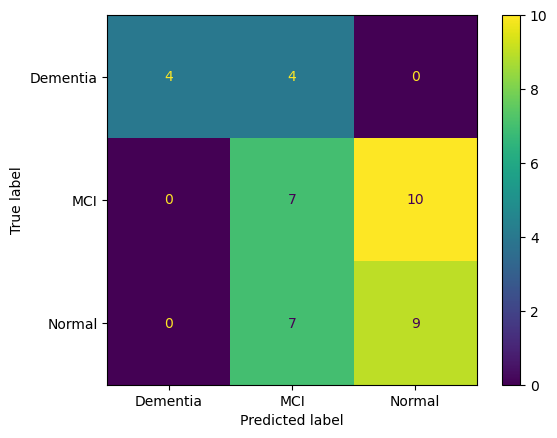

In [74]:
sns.reset_defaults()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Dementia', 'MCI', 'Normal'])
disp.plot()

Our selected features can seperate between dementia and normal, but it fails for MCI/normal or MCI/Dementia

### Desision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [77]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [78]:
pred = dt.predict(X_test)

In [79]:
print('Model accuracy score for decision tree: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred))


Model accuracy score for decision tree: 0.3659
              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.24      0.24      0.24        17
           2       0.43      0.56      0.49        16

    accuracy                           0.37        41
   macro avg       0.44      0.35      0.36        41
weighted avg       0.39      0.37      0.36        41



[[ 2  6  0]
 [ 1  4 12]
 [ 0  7  9]]


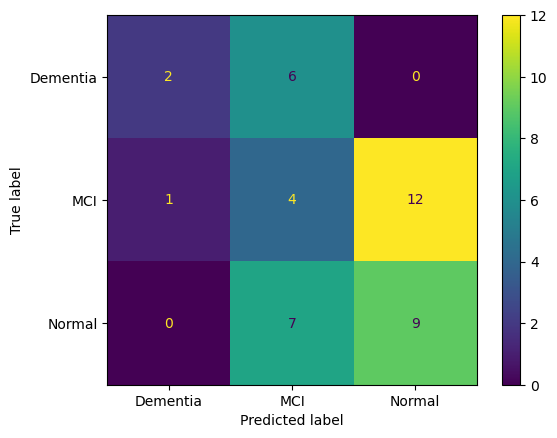

In [80]:
cm = confusion_matrix(y_test, pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Dementia', 'MCI', 'Normal'])
disp.plot()


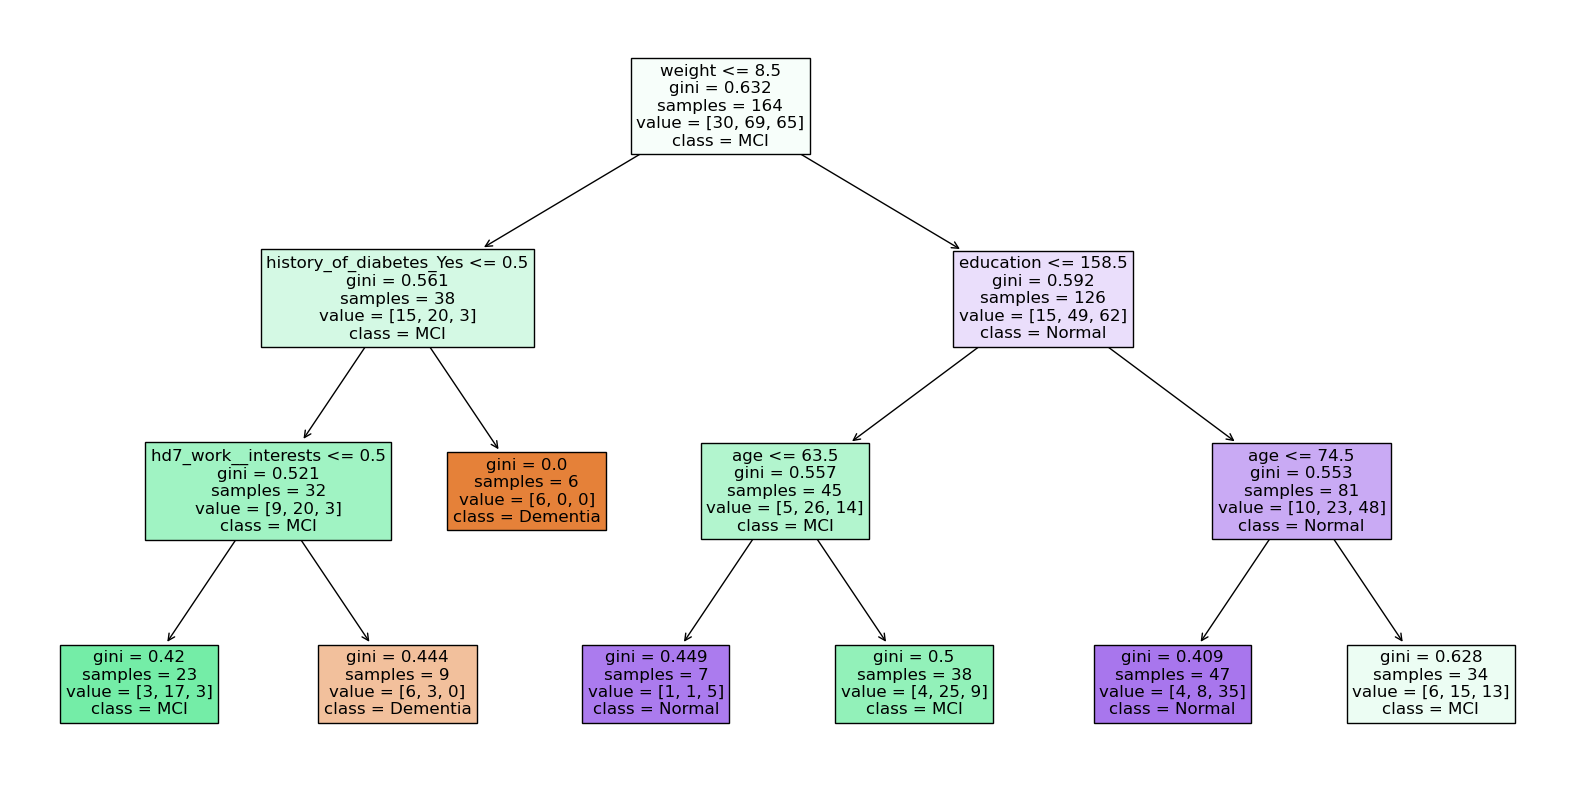

In [81]:
fig = plt.figure(figsize=(20,10))
_ = plot_tree(dt, 
                   feature_names=X_train.columns,  
                   class_names= ['Dementia', 'MCI', 'Normal'],
                   filled=True,  fontsize=12)

## Random Forest

Model accuracy score for decision tree: 0.5366
              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.45      0.53      0.49        17
           2       0.63      0.75      0.69        16

    accuracy                           0.54        41
   macro avg       0.53      0.47      0.46        41
weighted avg       0.53      0.54      0.51        41

[[ 1  7  0]
 [ 1  9  7]
 [ 0  4 12]]


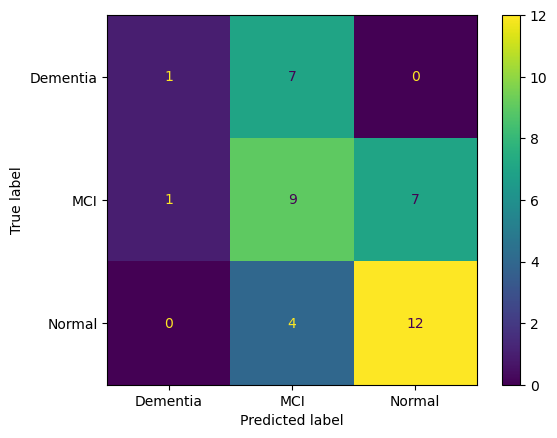

In [82]:
feature_names = X_train.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

pred = forest.predict(X_test)
print('Model accuracy score for decision tree: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Dementia', 'MCI', 'Normal'])
disp.plot()
# plt.tick_params(axis=u'both', which=u'both',length=0)
# plt.grid(b=None)

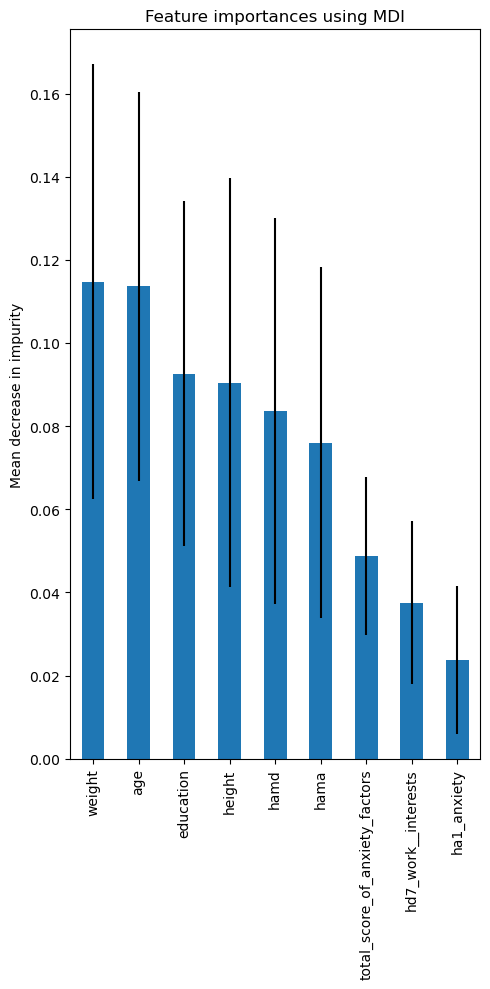

In [84]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending  = False,inplace = True)

fig, ax = plt.subplots(figsize=(5,10))
forest_importances[0:9].plot.bar(yerr=std[0:9], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Q2: Can cognitive assessment measures cluster normal, MCI and dementia patients?


Exclude total_scores since they are sum of other features.

In [86]:
q2Cols = ['age', 'education', 'height', 'weight', 'npi', 'mocab', 'mmse',
       'iadl', 'hama', 'hamd', 'c1_hvltimmediate_memory',
       'c5_hvltdelayed_recall_5min', 'c8_hvltdelayed_recall_20min',
       'c4_logical_memorywms', 'c6_boston_naming_test',
       'c3_articulateness_and_verbal_fluencey_vegetable_bnt', 'c7_stt_a',
       'c7_stt_b', 'c2_cft_rey_oimitation', 'c9_cft_rey_orecall',
       'hd1_depressive_mood', 'hd2_guilty', 'hd3_suicidal',
       'hd7_work__interests', 'ha6_total_score_of_depressive_mood',
       'ha1_anxiety', 'ha2_tension',
       'ha3_fear', 'ha14_interview_perfomance',
       'gender_Male',
       'history_of_cerebrovascular_disease_Yes', 'history_of_hypertension_Yes',
       'history_of_diabetes_Yes', 'history_of_coronary_heart_disease_Yes',
       'history_of_hyperlipidemia_Yes', 'history_of_anemia_Yes',
       'history_of_co_poisoning_Yes',
       'history_of_general_anesthesia_during_surgery_Yes',
       'history_of_abnormal_thyroid_function_Yes',
       'history_of_traumatic_brain_injury_Yes',
       'family_history_of_dementia_Yes', 'smoking_history_Yes',
       'drinking_history_Yes']

In [87]:
X = df[q2Cols]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,    test_size=.2, stratify=y, random_state= 1024)

Model accuracy score for decision tree: 0.7561
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.68      0.76      0.72        17
           2       1.00      0.94      0.97        16

    accuracy                           0.76        41
   macro avg       0.70      0.69      0.70        41
weighted avg       0.76      0.76      0.76        41

[[ 3  5  0]
 [ 4 13  0]
 [ 0  1 15]]


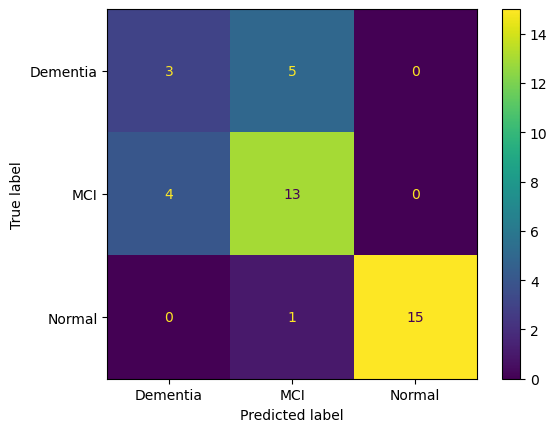

In [88]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print('Model accuracy score for decision tree: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Dementia', 'MCI', 'Normal'])
disp.plot()


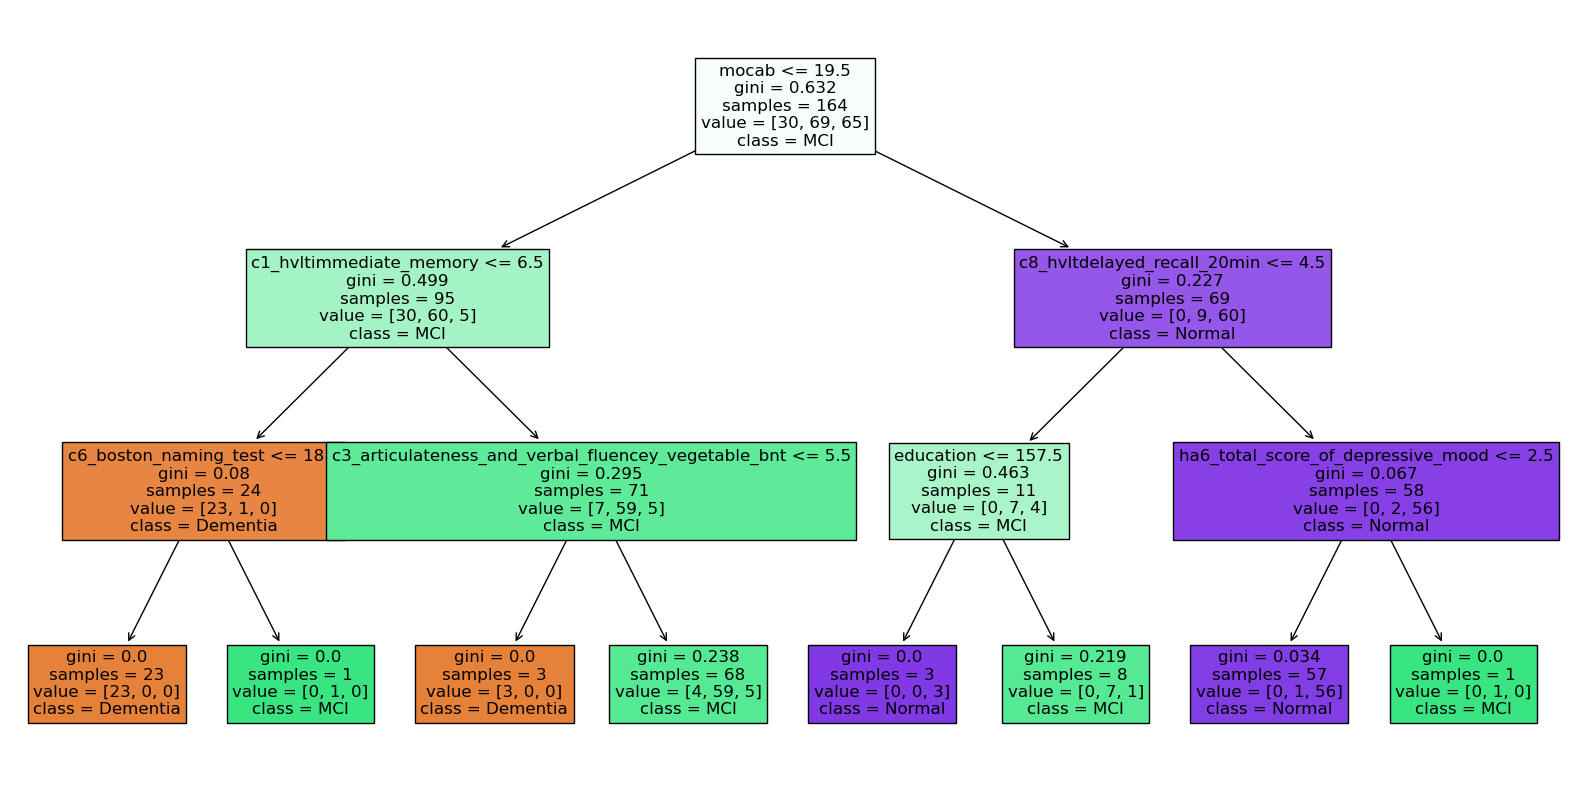

In [89]:
sns.reset_defaults()
fig = plt.figure(figsize=(20,10))
_ = plot_tree(dt, 
                   feature_names=X_train.columns,  
                   class_names= ['Dementia', 'MCI', 'Normal'],
                   filled=True,  fontsize=12)

## Random Forest

Model accuracy score for decision tree: 0.8780
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.88      0.82      0.85        17
           2       0.89      1.00      0.94        16

    accuracy                           0.88        41
   macro avg       0.87      0.86      0.86        41
weighted avg       0.88      0.88      0.88        41

[[ 6  2  0]
 [ 1 14  2]
 [ 0  0 16]]


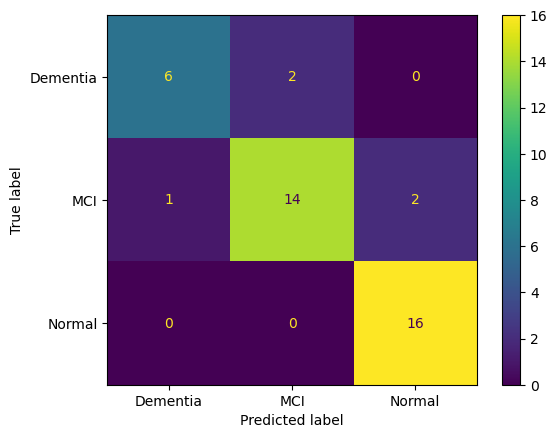

In [90]:
feature_names = X_train.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)



pred = forest.predict(X_test)
print('Model accuracy score for decision tree: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Dementia', 'MCI', 'Normal'])
disp.plot()


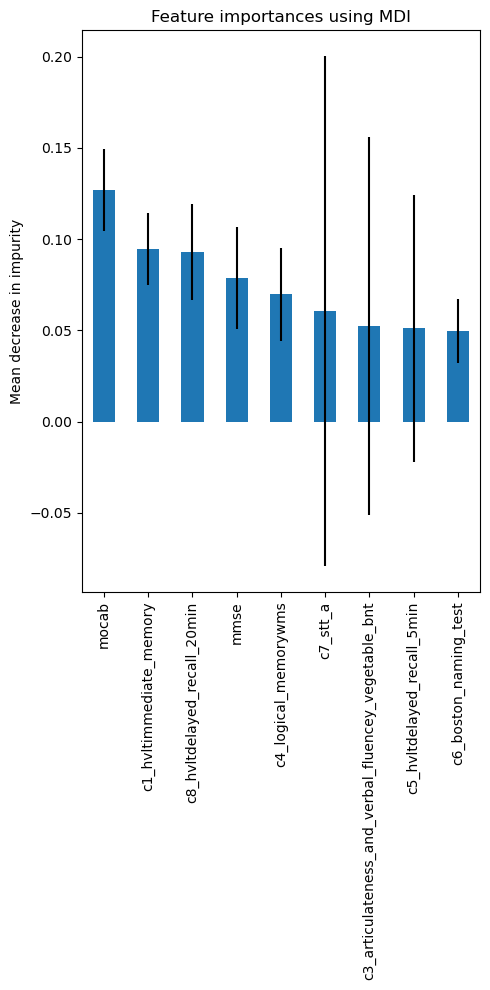

In [91]:

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending  = False,inplace = True)

fig, ax = plt.subplots(figsize=(5,10))
forest_importances[0:9].plot.bar(yerr=std[0:9], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [92]:
forest_importances[0:9]

mocab                                                  0.126994
c1_hvltimmediate_memory                                0.094606
c8_hvltdelayed_recall_20min                            0.093062
mmse                                                   0.078721
c4_logical_memorywms                                   0.069800
c7_stt_a                                               0.060632
c3_articulateness_and_verbal_fluencey_vegetable_bnt    0.052243
c5_hvltdelayed_recall_5min                             0.051150
c6_boston_naming_test                                  0.049738
dtype: float64